In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


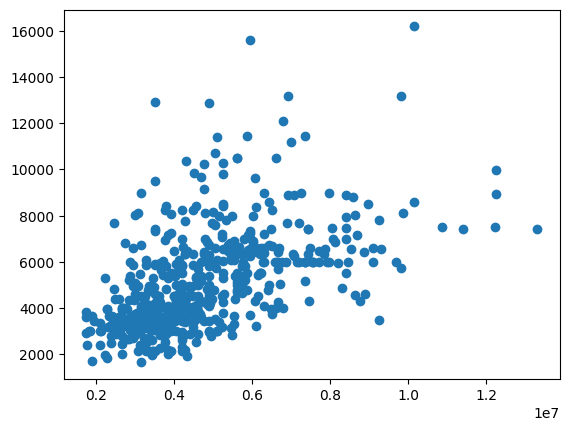

In [7]:
plt.scatter(df["price"], df["area"])
plt.show()

In [8]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
train_ratio = 0.8
split_idx = int(len(df) * train_ratio)
train_data = df[:split_idx]
test_data = df[split_idx:]
print("Length of training dataset:", len(train_data))
print("Length of test dataset:", len(test_data))

Length of training dataset: 436
Length of test dataset: 109


In [21]:
y = np.array(train_data["price"])
x = np.array(train_data["area"])

In [22]:
m = ((x * y).mean() - x.mean() * y.mean()) / ((x**2).mean() - (x.mean())**2)
m

np.float64(373.7591592245975)

In [23]:
b = y.mean() - m * x.mean()
b

np.float64(3226959.6977151623)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [27]:
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [30]:
print(model.coef_)
print(model.intercept_)

[373.75915922]
3226959.697715165


In [34]:
x_test = np.array(test_data["area"])
y_test = np.array(test_data["price"])

In [35]:
y_pred = model.predict(x_test.reshape(-1, 1))

In [40]:
from sklearn.metrics import r2_score

In [42]:
mae = np.abs(y_pred - y_test).sum()
mse = np.sqrt(np.sum((y_pred - y_test) ** 2))
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-square score:", r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 209984374.36037397
Mean Squared Error: 20930798.820477907
R-square score: -22.6270696108629


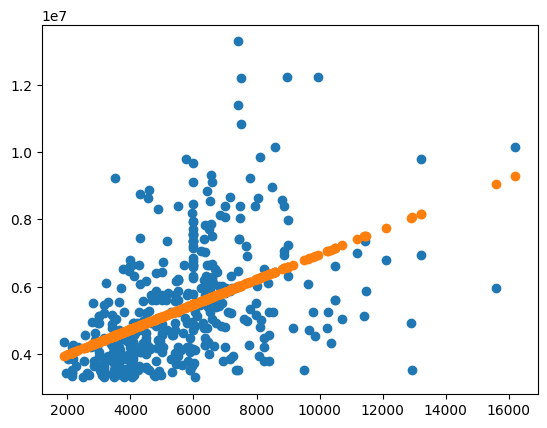

In [ ]:
plt.scatter(x, y)
plt.scatter(x, model.predict(x.reshape(-1, 1)))
plt.show()